In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def amplify(p, r, b):
    return 1 - (1 - p**r) ** b

def collision_probability(s):
    return 1 - np.arccos(s) / np.pi

COS_VALUES = np.arange(0.0, 1.01, 0.01)

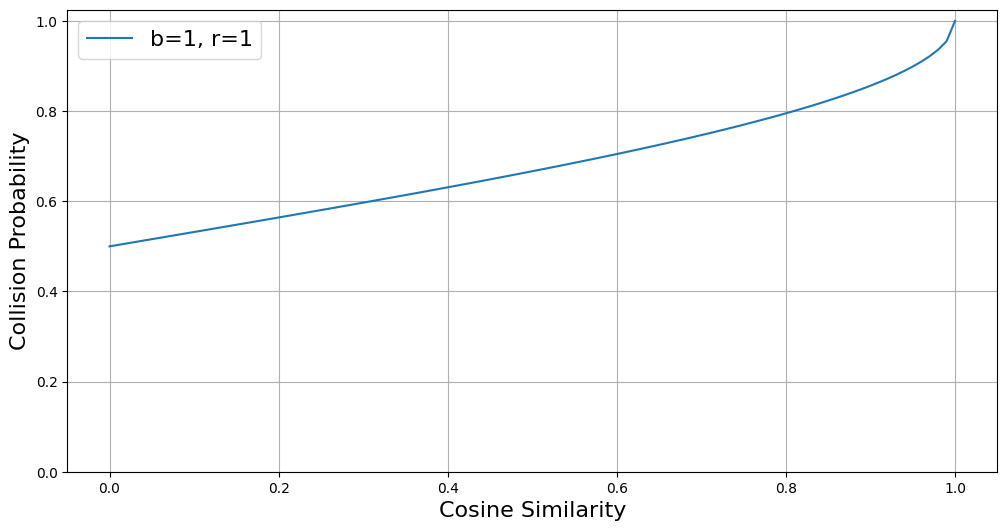

In [3]:
num_hashes = 1
r = 1
b = 1

plt.figure(figsize=(12, 6))
probabilities = []
for s in COS_VALUES:
    probabilities.append(amplify(collision_probability(s), num_hashes, 1))
sns.lineplot(x=COS_VALUES, y=probabilities, label=f"b={num_hashes//r}, r={num_hashes//b}")
plt.yticks(np.arange(0.0, 1.1, 0.2))
plt.xlabel("Cosine Similarity", fontsize=16)
plt.ylabel("Collision Probability", fontsize=16)
plt.legend(fontsize=16)
plt.grid()
plt.show()

## AND-construction

Adding more hyperplanes or hash functions (dimension of the signature) should make the probability of documents of low similarity to have less probability hashing into the same bucket.

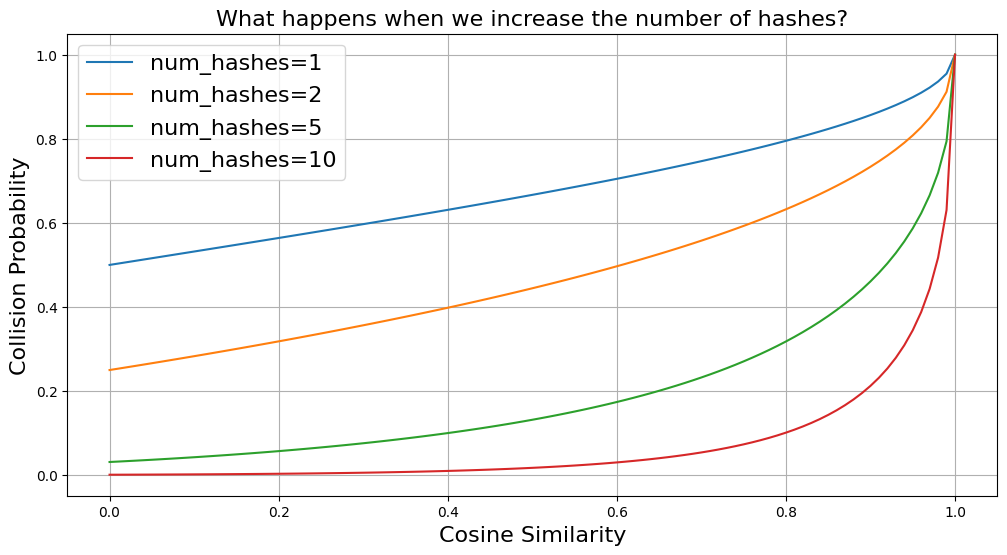

In [4]:
num_hashes_values = [1, 2, 5, 10]

plt.figure(figsize=(12, 6))
for num_hashes in num_hashes_values:
    probabilities = []
    for s in COS_VALUES:
        probabilities.append(amplify(collision_probability(s), num_hashes, 1))
    sns.lineplot(x=COS_VALUES, y=probabilities, label=f"num_hashes={num_hashes}")
plt.title("What happens when we increase the number of hashes?", fontsize=16)
plt.xlabel("Cosine Similarity", fontsize=16)
plt.ylabel("Collision Probability", fontsize=16)
plt.legend(fontsize=16)
plt.grid()
plt.show()

## OR-construction

Dividing the result of the hyperplanes into bands, we have more probability that a similar item gets hashed into the same bucket.

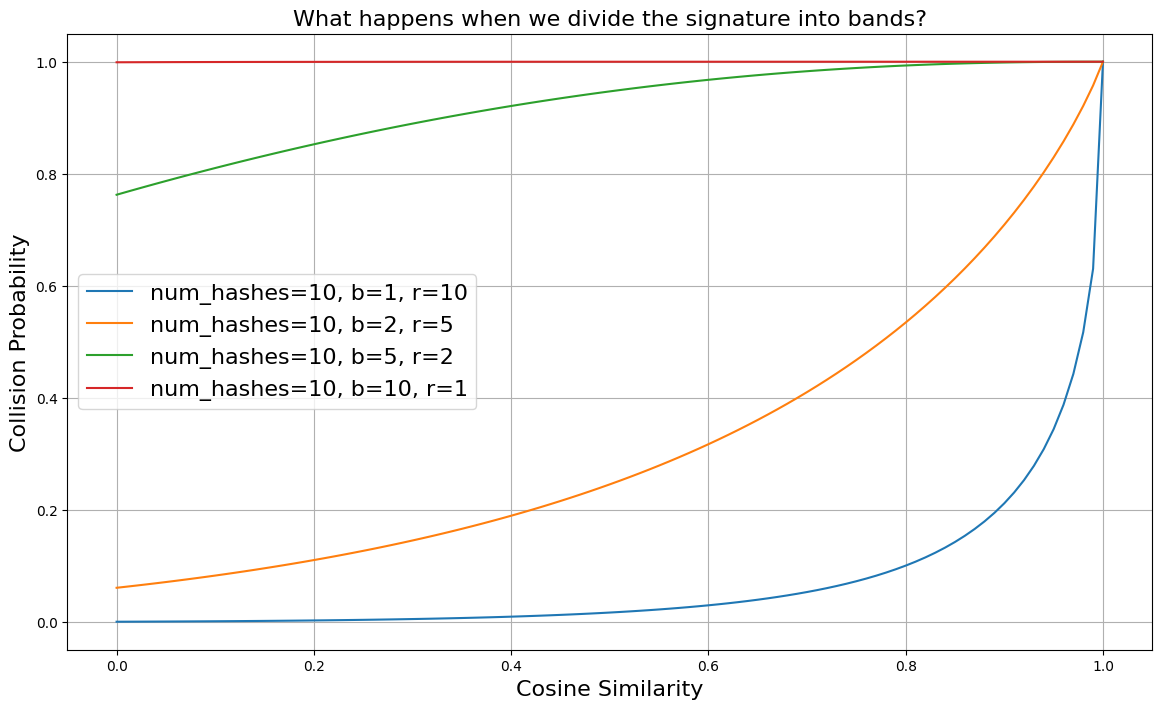

In [5]:
num_hashes = 10
b_values = [1, 2, 5, 10]

plt.figure(figsize=(14, 8))
for b in b_values:
    probabilities = []
    r = num_hashes//b
    for s in COS_VALUES:
        probabilities.append(amplify(1 - np.arccos(s) / np.pi, r, b))
    sns.lineplot(x=COS_VALUES, y=probabilities, label=f"num_hashes={num_hashes}, b={b}, r={r}")

plt.title("What happens when we divide the signature into bands?", fontsize=16)
plt.xlabel("Cosine Similarity", fontsize=16)
plt.ylabel("Collision Probability", fontsize=16)
plt.legend(fontsize=16)
plt.grid()
plt.show()

## Tuning $r$ and $b$ given $c$, $s_0$

By leveraging both OR and AND construction we achieve a better $S$ curve for a given similarity threshold $T$.

Best r: 15, Best b: 66, Num hashes: 990 for S0=0.8 and cS0=0.5599999999999999


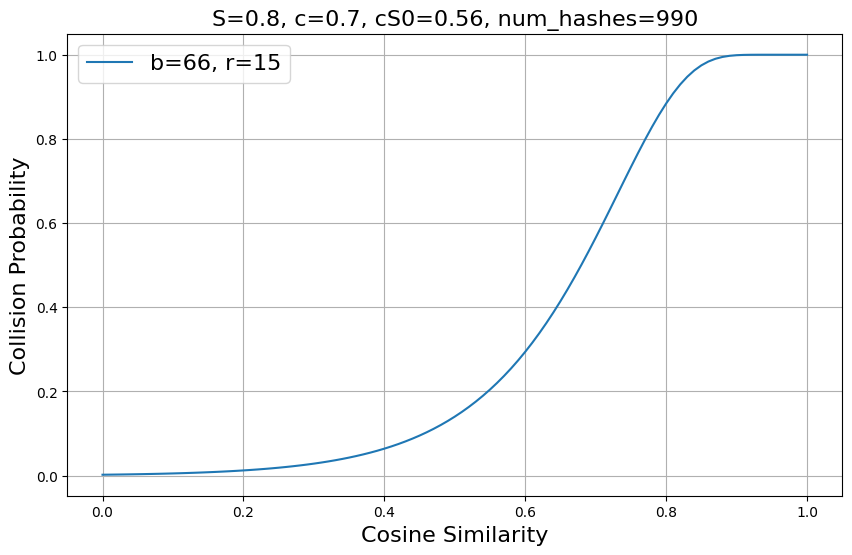

In [6]:
s0 = 0.8
c = 0.7
p1 = collision_probability(s0)
p2 = collision_probability(c * s0)
best_r, best_b = 1, 1
max_separation = 0
num_total_hashes = 0

MAX_NUM_HASHES = 1000

r_values = np.arange(1, 1000)
b_values = np.arange(1, 1000) 

for r in r_values:
    for b in b_values:
        if r * b > MAX_NUM_HASHES:
            break
        p1_amplified = amplify(p1, r, b)
        p2_amplified = amplify(p2, r, b)
        
        separation = p1_amplified - p2_amplified

        if separation > max_separation:
            max_separation = separation
            best_r, best_b = r, b

print(f"Best r: {best_r}, Best b: {best_b}, Num hashes: {best_r * best_b} for S0={s0} and cS0={c*s0}")

probabilities = []
for s in COS_VALUES:
    probabilities.append(amplify(collision_probability(s), best_r, best_b))

plt.figure(figsize=(10, 6))
sns.lineplot(x=COS_VALUES, y=probabilities, label=f"b={best_b}, r={best_r}")
plt.title(f"S={s0}, c={c}, cS0={c * s0:.2f}, num_hashes={best_r * best_b}", fontsize=16)
plt.xlabel("Cosine Similarity", fontsize=16)
plt.ylabel("Collision Probability", fontsize=16)
plt.legend(fontsize=16)
plt.grid()
plt.show()